In [33]:
import numpy as np
import pandas as pd

In [34]:
from density_matrix_from_exp import generate_rho_rho_delta
from deprecated.density_matrix_gen import prova

In [35]:
# Parameters
n = 2  # Number of qubits
m = 2  # Truncation parameter
delta = 0.1  # error << 1

# Generate density matrix
a_x = 1.0  # Coefficient for s_x s_x
h_x = 0.5  # Coefficient for s_z

rho_theta, rho_theta_delta = generate_rho_rho_delta(a_x, h_x, delta)

import pandas as pd
pd.DataFrame(rho_theta)

Hamiltonian H = [[ 1.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j -1.+0.j]]
terms:
[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]
[[ 0.5+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0.5+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0. +0.j -0.5+0.j -0. +0.j]
 [ 0. +0.j  0. +0.j -0. +0.j -0.5+0.j]]
[[ 0.5+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j -0.5+0.j  0. +0.j -0. +0.j]
 [ 0. +0.j  0. +0.j  0.5+0.j  0. +0.j]
 [ 0. +0.j -0. +0.j  0. +0.j -0.5+0.j]]
Hamiltonian H = [[ 1.2+0.j  0. +0.j  0. +0.j  1. +0.j]
 [ 0. +0.j  0. +0.j  1. +0.j  0. +0.j]
 [ 0. +0.j  1. +0.j  0. +0.j  0. +0.j]
 [ 1. +0.j  0. +0.j  0. +0.j -1.2+0.j]]
terms:
[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]
[[ 0.6+0.j  0. +0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0.6+0.j  0. +0.j  0. +0.j]
 [ 0. +0.j  0.

,0,1,2,3
0,0.512159-0.000000j,0.0-0.0j,0.0-0.0j,0.487841+0.108920j
1,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,-0.000000+0.000000j
2,0.000000+0.000000j,0.0+0.0j,0.0+0.0j,-0.000000+0.000000j
3,0.487841-0.108920j,-0.0+0.0j,-0.0+0.0j,0.487841+0.000000j


In [36]:
# Sub/Super Quantum Fisher Information (SSQFI) bounds
def compute_ssqfi_bounds(rho, rho_delta):
    trace_rho_sigma = np.trace(np.dot(rho, rho_delta))
    trace_rho2 = np.trace(np.dot(rho, rho))
    trace_sigma2 = np.trace(np.dot(rho_delta, rho_delta))

    sub_fidelity = trace_rho_sigma - np.sqrt(
        2
        * (
            trace_rho_sigma**2
            - np.trace(np.dot(np.dot(rho, rho_delta), np.dot(rho, rho_delta)))
        )
    )
    super_fidelity = trace_rho_sigma + np.sqrt((1 - trace_rho2) * (1 - trace_sigma2))

    # Compute SSQFI bounds
    lower_ssqfi = 8 * (1 - super_fidelity) / (delta**2)
    upper_ssqfi = 8 * (1 - sub_fidelity) / (delta**2)
    return lower_ssqfi, upper_ssqfi

In [37]:
i, j = compute_ssqfi_bounds(rho_theta, rho_theta_delta)
i, j = np.real(i), np.real(j)
print(f"lower = {(i)},\nupper = {(j)},\ndiff = ({(j-i)})")

lower = 13.424174731588854,
upper = 13.424175258167635,
diff = (5.265787805797117e-07)


In [38]:
def validate_density_matrix(rho):
    # Check Hermiticity
    if not np.allclose(rho, rho.conj().T, atol=1e-10):
        raise ValueError("Density matrix is not Hermitian.")

    # Check Trace is one
    if not np.isclose(np.trace(rho), 1.0, atol=1e-10):
        raise ValueError("Trace of density matrix is not 1.")

    # Check Positive Semi-Definiteness
    eigvals = np.linalg.eigvalsh(rho)
    if np.any(eigvals < -1e-10):  # Allow for small numerical errors
        raise ValueError("Density matrix has negative eigenvalues.")

    # Check if pure or not
    if np.isclose(np.trace(rho @ rho), 1.0, atol=1e-10):
        print("Density matrix is pure")
    else:
        print("Density matrix is mixed")
    
    print("and valid.")


In [39]:

validate_density_matrix(rho_theta)
validate_density_matrix(rho_theta_delta)


Density matrix is pure
and valid.
Density matrix is pure
and valid.


In [40]:
def compute_ssqfi_bounds_enforced(rho, rho_delta):
    # Validate inputs
    #validate_density_matrix(rho)
    #validate_density_matrix(rho_delta)

    # Compute traces
    trace_rho_sigma = np.real(np.trace(np.dot(rho, rho_delta)))
    trace_rho2 = np.real(np.trace(np.dot(rho, rho)))
    trace_sigma2 = np.real(np.trace(np.dot(rho_delta, rho_delta)))

    # Compute fidelities
    sub_fidelity = trace_rho_sigma - np.sqrt(
        max(0, 2 * (
            trace_rho_sigma**2
            - np.real(np.trace(np.dot(np.dot(rho, rho_delta), np.dot(rho, rho_delta))))
        ))
    )
    super_fidelity = trace_rho_sigma + np.sqrt(
        max(0, (1 - trace_rho2) * (1 - trace_sigma2))
    )

    # Compute SSQFI bounds
    lower_ssqfi = 8 * (1 - super_fidelity) / (delta**2)
    upper_ssqfi = 8 * (1 - sub_fidelity) / (delta**2)

    return lower_ssqfi, upper_ssqfi


In [41]:
i, j = compute_ssqfi_bounds_enforced(rho_theta, rho_theta_delta)
print(f"lower = {i},\nupper = {j},\ndiff = ({j-i})")

lower = 13.424174731588854,
upper = 13.424174731588854,
diff = (0.0)


In [42]:
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

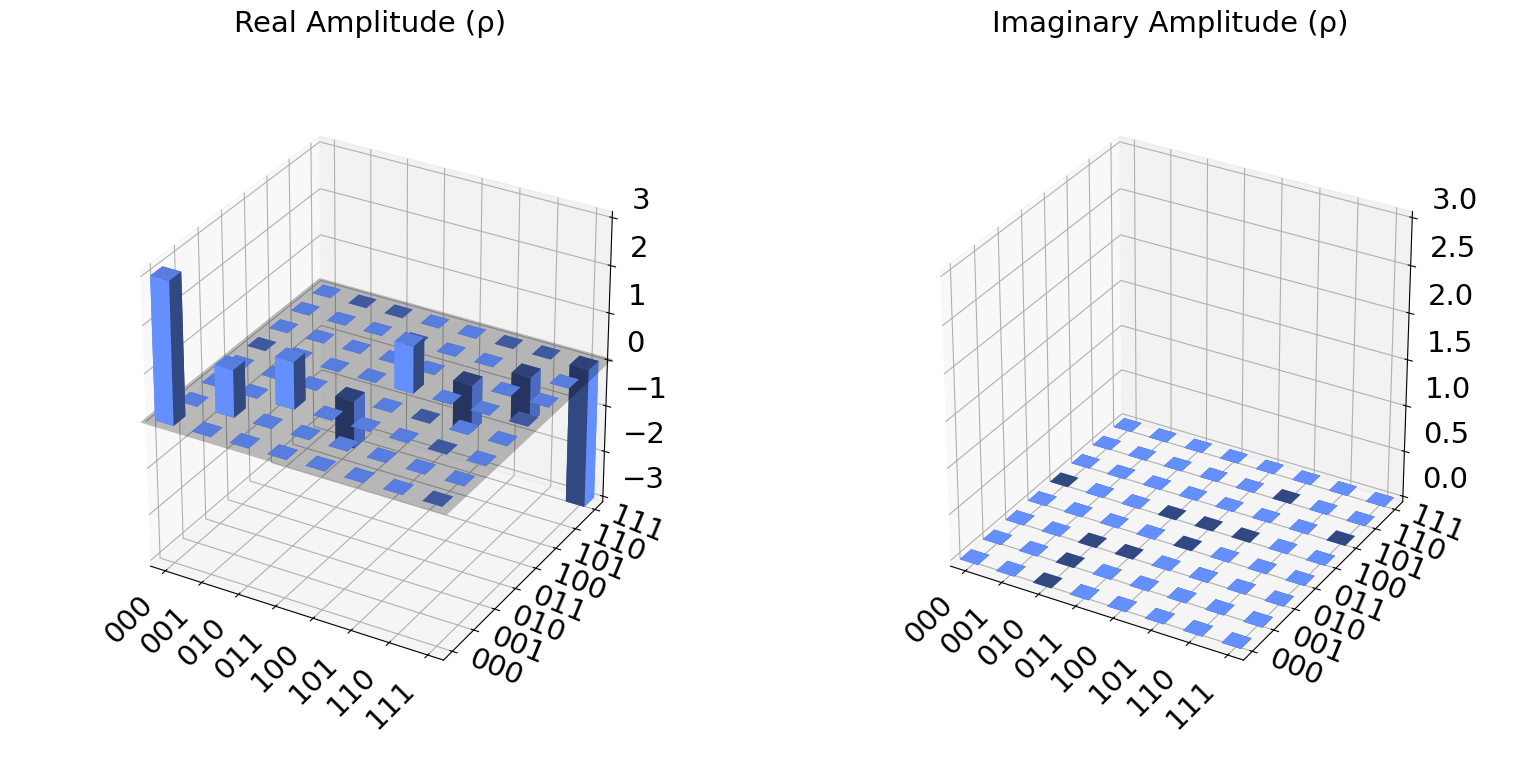

In [ ]:
m = np.kron(np.kron(Z, I), I)
m += np.kron(np.kron(I, Z), I)
m += np.kron(np.kron(I, I), Z)
pd.DataFrame(m)
plot_state_city(m)

In [115]:


#m = np.kron(np.kron(Z, I), I) * np.kron(np.kron(I, Z), I) * np.kron(np.kron(I, I), Z)
a_x = 1
h_z = 0.1
m = a_x * np.kron(np.kron(X, X), I)
#m += a_x * np.kron(np.kron(I, X),X)
#m += h_z * np.kron(np.kron(Z,I),I)
#m += h_z * np.kron(np.kron(I,Z),I)
#m += h_z * np.kron(np.kron(I,I),Z)
pd.DataFrame(m)
#plot_state_city(m)

,0,1,2,3,4,5,6,7
0,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,1.00+0.00j,0.00+0.00j
1,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,1.00+0.00j
2,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,1.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j
3,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,1.00+0.00j,0.00+0.00j,0.00+0.00j
4,0.00+0.00j,0.00+0.00j,1.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j
5,0.00+0.00j,0.00+0.00j,0.00+0.00j,1.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j
6,1.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j
7,0.00+0.00j,1.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j,0.00+0.00j


In [120]:
from density_generator import IsingQuantumState
from qiskit.visualization import plot_state_city
from importlib import reload
reload(density_generator)
pd.options.display.float_format = "{:,.2f}".format

model = IsingQuantumState(n=3, a_x=1, h_z=1)
H = model.generate_density_matrix()

#plot_state_city(H)
print(pd.DataFrame(H))

           0          1          2          3          4          5  \
0 0.70+0.00j 0.00+0.00j 0.00+0.00j 0.20-0.05j 0.00+0.00j 0.36-0.04j   
1 0.00-0.00j 0.00+0.00j 0.00+0.00j 0.00-0.00j 0.00+0.00j 0.00-0.00j   
2 0.00-0.00j 0.00+0.00j 0.00+0.00j 0.00-0.00j 0.00+0.00j 0.00-0.00j   
3 0.20+0.05j 0.00+0.00j 0.00+0.00j 0.06-0.00j 0.00+0.00j 0.10+0.01j   
4 0.00-0.00j 0.00+0.00j 0.00+0.00j 0.00-0.00j 0.00+0.00j 0.00-0.00j   
5 0.36+0.04j 0.00+0.00j 0.00+0.00j 0.10-0.01j 0.00+0.00j 0.18-0.00j   
6 0.20+0.05j 0.00+0.00j 0.00+0.00j 0.06+0.00j 0.00+0.00j 0.10+0.01j   
7 0.00-0.00j 0.00+0.00j 0.00+0.00j 0.00-0.00j 0.00+0.00j 0.00-0.00j   

           6          7  
0 0.20-0.05j 0.00+0.00j  
1 0.00-0.00j 0.00+0.00j  
2 0.00-0.00j 0.00+0.00j  
3 0.06-0.00j 0.00+0.00j  
4 0.00-0.00j 0.00+0.00j  
5 0.10-0.01j 0.00+0.00j  
6 0.06-0.00j 0.00+0.00j  
7 0.00-0.00j 0.00+0.00j  


In [ ]:
from ising_density_2D import (
    generate_density_matrices_with_perturbation as generate_rho_rho_delta,
 )

n = 2  # Number of qubits
m = 2  # Truncation parameter
delta = 0.001  # Small error for derivative approximation

# Generate density matrix (simulated state)
a_x = 1.0  # Coefficient for s_x s_x
h_z = 0.5  # Coefficient for s_z

# Generating the quantum states rho(theta) and rho(theta + delta)
rho_theta, rho_theta_delta = generate_rho_rho_delta(a_x, h_z, delta)

[[ 1.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j -1.+0.j]]
la U e': 
[[ 1.55943695e-01-0.698456j    0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00-0.698456j  ]
 [ 0.00000000e+00+0.j          5.40302306e-01+0.j
   0.00000000e+00-0.84147098j  0.00000000e+00+0.j        ]
 [ 0.00000000e+00+0.j          0.00000000e+00-0.84147098j
   5.40302306e-01+0.j          0.00000000e+00+0.j        ]
 [-1.25285803e-17-0.698456j    0.00000000e+00+0.j
   0.00000000e+00+0.j          1.55943695e-01+0.698456j  ]]
[[ 1.002+0.j  0.   +0.j  0.   +0.j  1.   +0.j]
 [ 0.   +0.j  0.   +0.j  1.   +0.j  0.   +0.j]
 [ 0.   +0.j  1.   +0.j  0.   +0.j  0.   +0.j]
 [ 1.   +0.j  0.   +0.j  0.   +0.j -1.002+0.j]]
la U e': 
[[ 1.54545929e-01-0.69930889j  0.00000000e+00+0.j
   0.00000000e+00+0.j          0.00000000e+00-0.69791306j]
 [ 0.00000000e+00+0.j          5.40302306e-01+0.j
   0.00000000e+00-0.84147098j  0.00000000e+00+

In [65]:
from density_generator import IsingQuantumState
from qiskit.visualization import plot_state_city
pd.options.display.float_format = "{:,.2f}".format

model = IsingQuantumState(n=3, a_x=1, h_z=2)
H = model.generate_density_matrix()

#plot_state_city(H)
print(pd.DataFrame(H))

            0           1           2           3           4           5  \
0  0.95+0.00j  0.00+0.00j  0.00+0.00j  0.12+0.02j  0.00+0.00j -0.12+0.09j   
1  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j -0.00+0.00j   
2  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j -0.00+0.00j   
3  0.12-0.02j  0.00-0.00j  0.00-0.00j  0.02+0.00j  0.00-0.00j -0.01+0.01j   
4  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j -0.00+0.00j   
5 -0.12-0.09j -0.00+0.00j -0.00+0.00j -0.01-0.01j -0.00+0.00j  0.02-0.00j   
6  0.12-0.02j  0.00-0.00j  0.00-0.00j  0.02+0.00j  0.00-0.00j -0.01+0.01j   
7  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j  0.00+0.00j -0.00+0.00j   

            6           7  
0  0.12+0.02j  0.00+0.00j  
1  0.00+0.00j  0.00+0.00j  
2  0.00+0.00j  0.00+0.00j  
3  0.02-0.00j  0.00-0.00j  
4  0.00+0.00j  0.00+0.00j  
5 -0.01-0.01j -0.00+0.00j  
6  0.02+0.00j  0.00-0.00j  
7  0.00+0.00j  0.00+0.00j  
